https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

# Objective of this Notebook is to predict by each column, see which has the highest Accuracy rate, meaning it contributes to feature importance

# Predict on Single Model

# Train Model

In [13]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset

import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
df_cols = df.columns.to_list()
print("df_cols:",df_cols)
df_noX = df.iloc[:,:-1]
df_noX

df_cols: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,6,9,2,4,0,4,1,39
1,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,4,11,0,6,1,4,1,39
2,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,4,1,2,6,0,2,1,39
3,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,4,9,2,10,5,2,0,5
4,0.273973,0.184932,0.866667,0.000000,0.0,0.397959,4,12,2,4,5,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,4,7,2,13,5,4,0,39
32556,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,4,11,2,7,0,4,1,39
32557,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,4,11,6,1,4,4,0,39
32558,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,4,11,4,1,3,4,1,39


# Predict on each column

In [37]:
final_accuracy_list = []
test_accuracy_list = []

# Predict on all Columns

In [38]:

for col_num in range(df_noX.shape[1]):

    print("col_num:",col_num)

    # Get X for each Column
    X = df_noX.iloc[:,col_num].to_numpy()
    y = df.iloc[:,-1].to_numpy()

    # ensure all data are floating point values
    X = X.astype('float32')
    # encode strings to integer
    y = LabelEncoder().fit_transform(y)
    # split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    # determine the number of input features
    n_features = 1#X_train.shape[1]
    print("n_features:",n_features)
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # fit the model
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
    # evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Test Accuracy: %.3f' % acc)
    test_accuracy_list.append(acc)
    # make a prediction
    P_list = []
    df_test = pd.read_csv('./dataset/adult_test_RenameCol_MinMax_LE.csv',index_col = 0)
    for i in range(len(df_test)):
        df_test_topred = df_test.iloc[i, col_num]
        df_test_topred = np.array(df_test_topred).reshape(1,-1)

        #predict
        yhat = model.predict(df_test_topred)
        P_list.append(yhat[0][0])
    #         print("yhat:",yhat)
    binary_list = []
    for p in P_list:
        if p > 0.5:
            binary_list .append(1)
        else:
            binary_list .append(0)
    df_binary = pd.DataFrame(binary_list,columns = ['binary_pred'])
    df_P_list = pd.DataFrame(P_list,columns = ['P'])
    df_pred = pd.concat([df_binary, df_P_list],axis=1)
    df_pred_wactual = pd.concat([df_pred, df_test['class']],axis=1)
    df_pred_wactual
    count = 0
    for i in range(len(df_pred_wactual)):
        if df_pred_wactual.iloc[i,0] == df_pred_wactual.iloc[i,2]: 
            count+=1
    print("count:",count)
    final_accuracy = count/len(df_pred_wactual)
    print('We have confidence score of {}'.format(final_accuracy))
    final_accuracy_list.append(final_accuracy)

col_num: 0
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.762
count: 12434
We have confidence score of 0.7637592137592137
col_num: 1
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.756
count: 12434
We have confidence score of 0.7637592137592137
col_num: 2
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.778
count: 12699
We have confidence score of 0.780036855036855
col_num: 3
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.806
count: 13057
We have confidence score of 0.802027027027027
col_num: 4
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.786
count: 12294
We have confidence score of 0.7551597051597052
col_num: 5
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.752
count: 12434
We have confidence score of 0.7637592137592137
col_num: 6
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Test Accuracy: 0.755
count: 12434
We have confidence score of 0.7637592137592137
col_num: 7
(29304,) (3

# Made Error so i had to get back results. To DELETE

In [100]:
final_accuracy_list

df_total_dev_test_acc = pd.read_csv('./results/MLP Feature Importance Accuracy (Part 4).csv',index_col = 0)
test_accuracy_list = df_total_dev_test_acc.iloc[1, :].to_list()
test_accuracy_list


[0.7637592137592137,
 0.7637592137592137,
 0.780036855036855,
 0.802027027027027,
 0.7551597051597052,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137]

In [104]:


df_final_accuracy = pd.DataFrame(final_accuracy_list, columns= ['test_Accuracy'])
df_test_accuracy = pd.DataFrame(test_accuracy_list, columns= ['dev_Accuracy'])

df_test_accuracy
df_total_dev_test_acc = pd.concat([df_test_accuracy,df_final_accuracy],axis=1).T
df_total_dev_test_acc
df_total_dev_test_acc.columns = df_cols[:-1]
# # df_total_dev_test_acc.to_csv('./results/MLP Feature Importance Accuracy (Part 4).csv')
df_total_dev_test_acc


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
dev_Accuracy,0.763759,0.763759,0.780037,0.802027,0.75516,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759
test_Accuracy,0.763759,0.763759,0.780037,0.802027,0.75516,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759,0.763759


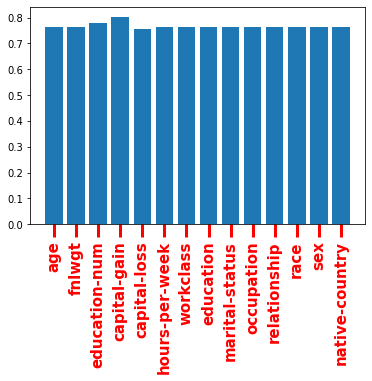

[0.7637592137592137,
 0.7637592137592137,
 0.780036855036855,
 0.802027027027027,
 0.7551597051597052,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137,
 0.7637592137592137]

In [105]:
def get_sorted(ndarray, colname):

    ndarray, colname = zip(*sorted(zip(ndarray, colname)))

    return ndarray, colname

def get_plot(X_cols, importance):
    # plot feature importance
    plt.bar(X_cols, importance)
    plt.xticks(X_cols, X_cols, color='orange', rotation=90, fontweight='bold', fontsize='15')
    plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3)

    plt.show()
get_plot(df_cols[:-1], test_accuracy_list)
test_accuracy_list

In [108]:
type(df_cols[:-1])
type(test_accuracy_list)


list

# Predict for each test row 

In [39]:
import requests
def get_pass():
    
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)
get_pass()